# AlexNet

AlexNet was primarily designed by Alex Krizhevsky. It was published with Ilya Sutskever and Krizhevsky’s doctoral advisor Geoffrey Hinton, and is a Convolutional Neural Network or CNN. 

After competing in ImageNet Large Scale Visual Recognition Challenge, AlexNet shot to fame. It achieved a top-5 error of 15.3%. This was 10.8% lower than that of runner up. 

AlexNet was the first convolutional network which used GPU to boost performance. 

![AlexNet](./assets/alexnet.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import os
import time

In [2]:
# Loading the dataset using keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images.shape)

(50000, 32, 32, 3)


In [3]:
# Creating a python list containing thr classes for referencing the clas names of the images during visualization

CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Important Features

AlexNet was much larger than previous CNNs used for computer vision tasks. It has 60 million parameters and 650,000 neurons and took five to six days to train on two GTX 580 3GB GPUs. Today there are much more complex CNNs that can run on faster GPUs very efficiently even on very large datasets. 

1. Multiple Convolutional Kernels (a.k.a filters) extract interesting features in an image.
2. The fifth convolutional layer is followed by an Overlapping Max Pooling layer.Max Pooling layers are usually used to downsample the width and height of the tensors, keeping the depth same.
3. ReLU nonlinearity is applied after all the convolution and fully connected layers. 

In [9]:
# Creating model using Keras Sequential API.

AlexNet = tf.keras.Sequential([
    tfl.Resizing(224,224),
    #Conv1
    tfl.Conv2D(96,11,strides=(4, 4),padding='valid', input_shape = (227,227,3)), 
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #Conv2
    tfl.Conv2D(256,5,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #Conv3
    tfl.Conv2D(384,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    #Conv4
    tfl.Conv2D(384,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    #Conv5
    tfl.Conv2D(256,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #FC1
    tfl.Flatten(),
    tfl.Dense(4096, activation = 'relu'),
    tfl.Dropout(0.5),
    #FC2
    tfl.Dense(4096,activation = 'relu'),
    tfl.Dropout(0.5),
    #FC3
    tfl.Dense(10,activation = 'softmax')
    ])
AlexNet.build((50000,224,224,3))
AlexNet.compile( loss ='sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (50000, 224, 224, 3)      0         
                                                                 
 conv2d (Conv2D)             (50000, 54, 54, 96)       34944     
                                                                 
 re_lu (ReLU)                (50000, 54, 54, 96)       0         
                                                                 
 batch_normalization (BatchN  (50000, 54, 54, 96)      384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (50000, 26, 26, 96)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (50000, 26, 26, 256)      6

In [10]:
# Training the model using Model.fit(). It outputs a dictionary containg loss, accuracy, val_loss and val_accuracy
history = AlexNet.fit(train_images, train_labels,epochs = 40, batch_size = 64, validation_data = (test_images, test_labels))

Epoch 1/40
782/782 [==============================] - 66s 78ms/step - loss: 2.5333 - accuracy: 0.3138 - val_loss: 1.6582 - val_accuracy: 0.3914
Epoch 2/40
782/782 [==============================] - 58s 74ms/step - loss: 1.5628 - accuracy: 0.4416 - val_loss: 1.6819 - val_accuracy: 0.3960
Epoch 3/40
782/782 [==============================] - 58s 74ms/step - loss: 1.3273 - accuracy: 0.5326 - val_loss: 1.2909 - val_accuracy: 0.5569
Epoch 4/40
782/782 [==============================] - 58s 74ms/step - loss: 1.1032 - accuracy: 0.6208 - val_loss: 1.9929 - val_accuracy: 0.4222
Epoch 5/40
782/782 [==============================] - 58s 74ms/step - loss: 0.9238 - accuracy: 0.6857 - val_loss: 1.6066 - val_accuracy: 0.4755
Epoch 6/40
782/782 [==============================] - 58s 74ms/step - loss: 0.7973 - accuracy: 0.7287 - val_loss: 0.9192 - val_accuracy: 0.6942
Epoch 7/40
782/782 [==============================] - 60s 76ms/step - loss: 0.6939 - accuracy: 0.7658 - val_loss: 0.7360 - val_accuracy:

In [11]:
# Plotting graphs of accuracy and loss vs epochs

def plothist(hist):
    plt.figure(1)



    plt.subplot(211)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')

    plt.tight_layout()


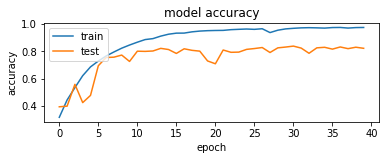

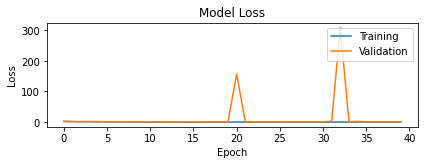

In [12]:
plothist(history)